In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH_DATASET = "/kaggle/input/predict-energy-behavior-of-prosumers"
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv(os. path.join(PATH_DATASET, "train.csv"))
print(f"data size: {len(df_train)}")
display(df_train.head())

data size: 2018352


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [3]:
train_nan_ = df_train.isnull().sum()
df_train.dropna(inplace=True)
train_nan = pd.DataFrame(dict(before=train_nan_, after=df_train.isnull().sum()))
display(train_nan.T)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
before,0,0,0,528,0,0,0,0,0
after,0,0,0,0,0,0,0,0,0


In [4]:
def extend_datetime_features(df, col_dt="datetime", datetime_offset=None):
    df[col_dt] = pd.to_datetime(df[col_dt])
    if not datetime_offset:
        datetime_offset = df[col_dt].min()
    df["date"] = df[col_dt].dt.date
    df["date_year"] = df[col_dt].dt.year
    df["date_month"] = df[col_dt].dt.month
    df["date_day"] = df[col_dt].dt.day
    df["date_dayofyear"] = df[col_dt].dt.dayofyear
    df["date_dayofweek"] = df[col_dt].dt.dayofweek
    df["date_weekday"] = df[col_dt].dt.weekday
    df["time_hour"] = df[col_dt].dt.hour
    df["time_minute"] = df[col_dt].dt.minute
    df["date_delta"] = (df[col_dt] - datetime_offset).dt.days
    df["time_delta"] = df[col_dt].dt.hour + (df[col_dt].dt.minute / 60.)
    return datetime_offset

datetime_offset = extend_datetime_features(df_train)
display(df_train.head())

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0


<Axes: xlabel='target', ylabel='Frequency'>

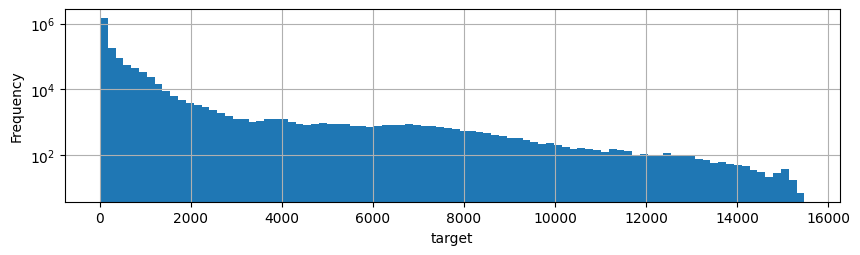

In [5]:
fig = plt.figure(figsize=(10, 2.5))
# sns.histplot(data=df_train, x=col, hue="target_", ax=fig.gca())
df_train["target"].plot.hist(ax=fig.gca(), bins=90, logy=True, xlabel="target", grid=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

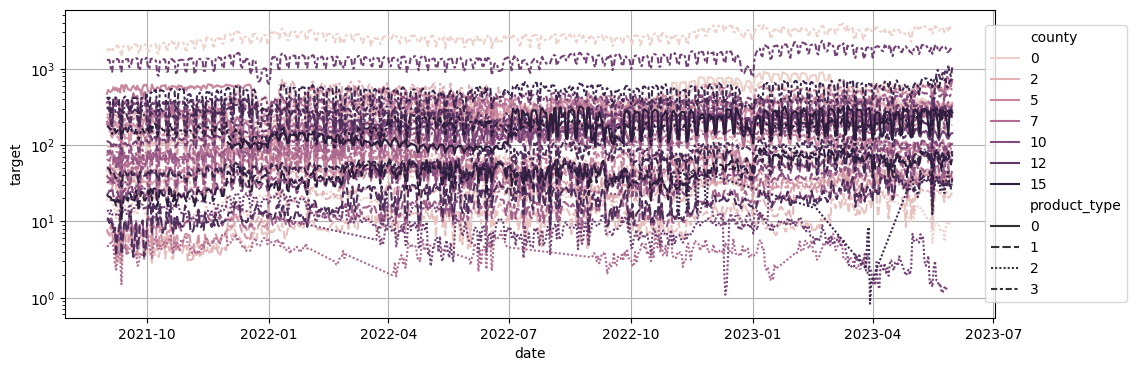

In [6]:
df_train_ = df_train.groupby(["date", "product_type", "county"])["target"].mean().reset_index(name="target")
# display(df_train_)

fig = plt.figure(figsize=(12, 4))
ax = sns.lineplot(data=df_train_, x='date', y='target', style="product_type", hue="county", ax=fig.gca())
ax.grid(), ax.set_yscale('log')
ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))

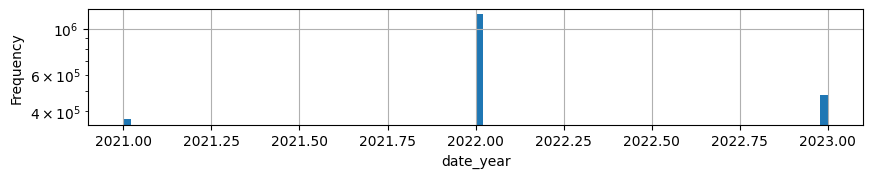

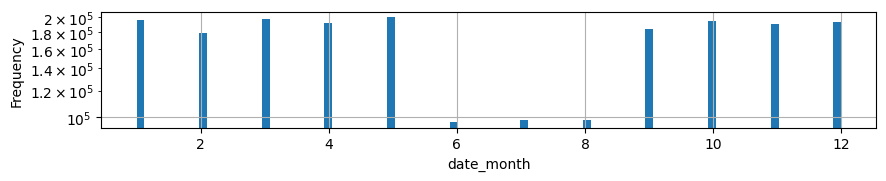

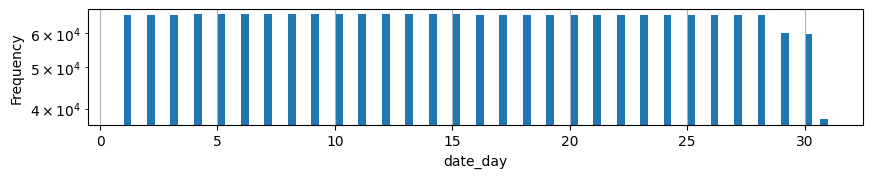

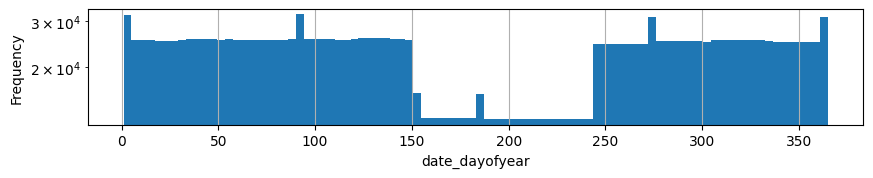

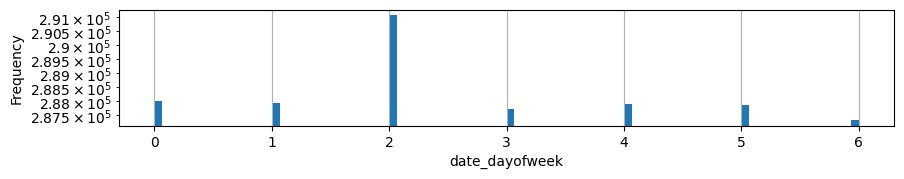

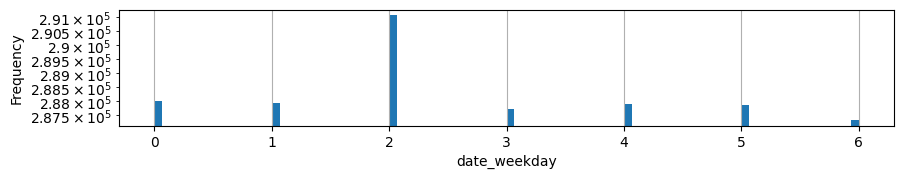

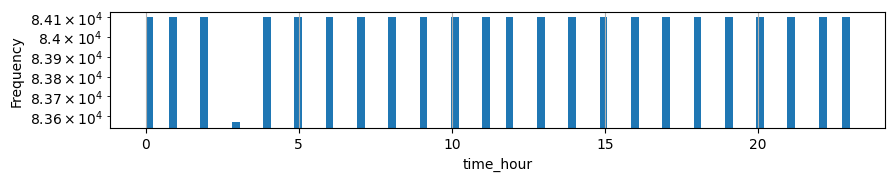

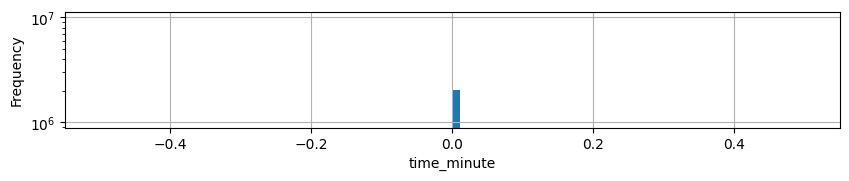

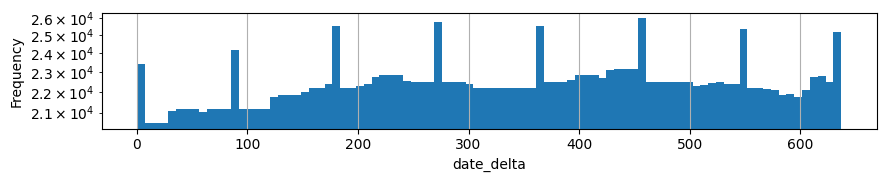

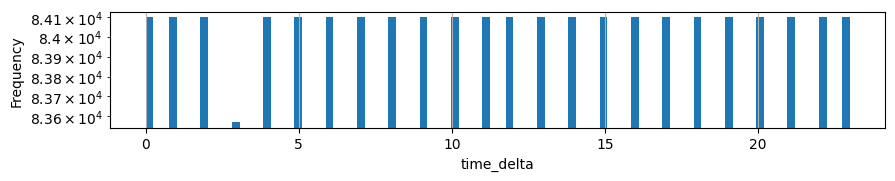

In [7]:
for col in filter(lambda c: c.startswith("date_") or c.startswith("time_"), df_train.columns):
    fig = plt.figure(figsize=(10, 1.5))
    df_train[col].plot.hist(ax=fig.gca(), bins=90, logy=True, xlabel=col, grid=True)

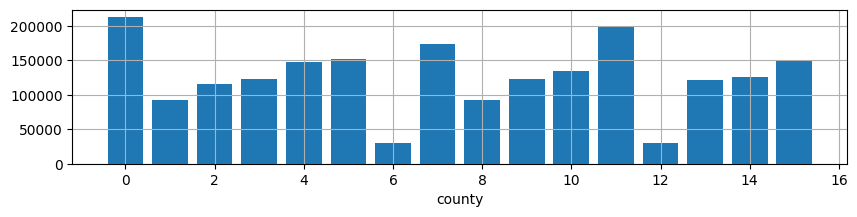

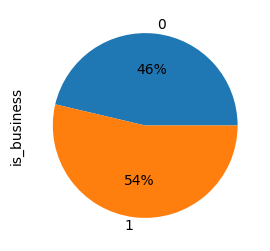

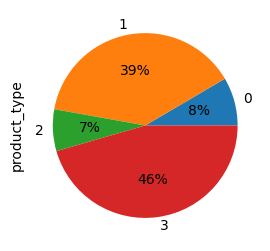

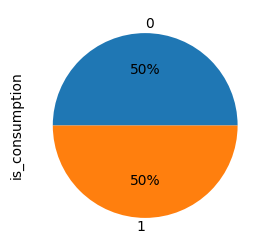

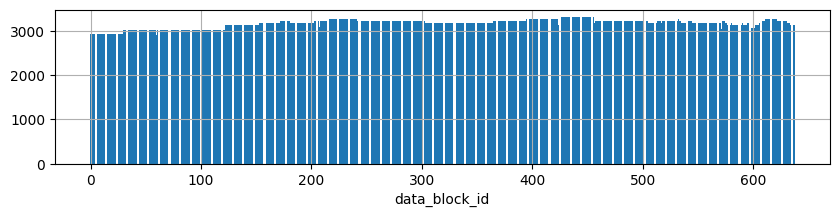

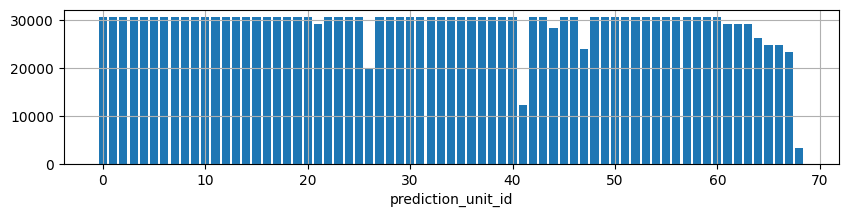

In [8]:
for col in ['county', 'is_business', 'product_type', 'is_consumption', 'data_block_id', 'prediction_unit_id']:  #
    lbs, counts = np.unique(df_train[col].values, return_counts=True)
    if len(lbs) < 9:
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.pie(counts, labels=lbs, autopct='%.0f%%')
        ax.set_ylabel(col)
    else:
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.bar(lbs, counts)
        ax.set_xlabel(col)
        ax.grid()

In [9]:
df_client = pd.read_csv(os. path.join(PATH_DATASET, "client.csv"))
print(f"data size: {len(df_client)}")
display(df_client.head())

data size: 41919


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [10]:
df_elect_prices = pd.read_csv(os. path.join(PATH_DATASET, "electricity_prices.csv"))
print(f"data size: {len(df_elect_prices)}")
display(df_elect_prices.head())

data size: 15286


,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

((0.0, 1100.0), None)

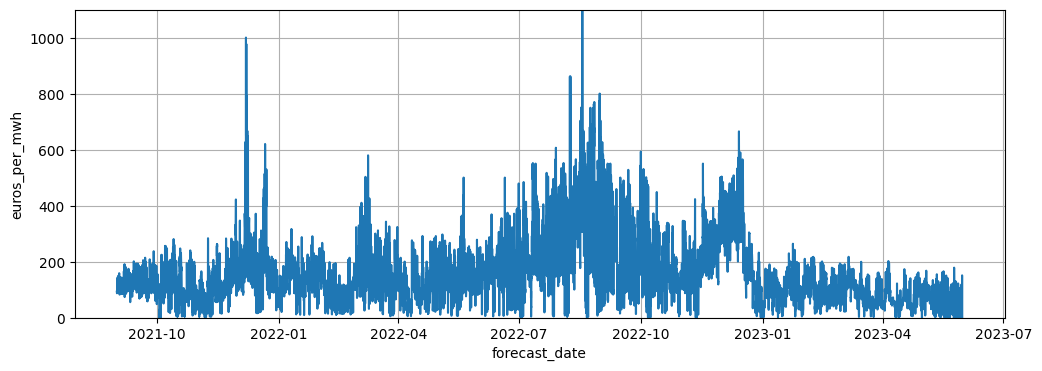

In [11]:
df_elect_prices['forecast_date'] = pd.to_datetime(df_elect_prices['forecast_date'])
fig = plt.figure(figsize=(12, 4))
ax = sns.lineplot(data=df_elect_prices, x='forecast_date', y='euros_per_mwh', ax=fig.gca())
ax.set_ylim([0, 1100]), ax.grid()

In [12]:
df_gas_prices = pd.read_csv(os. path.join(PATH_DATASET, "gas_prices.csv"))
print(f"data size: {len(df_gas_prices)}")
display(df_gas_prices.head())

data size: 637


,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

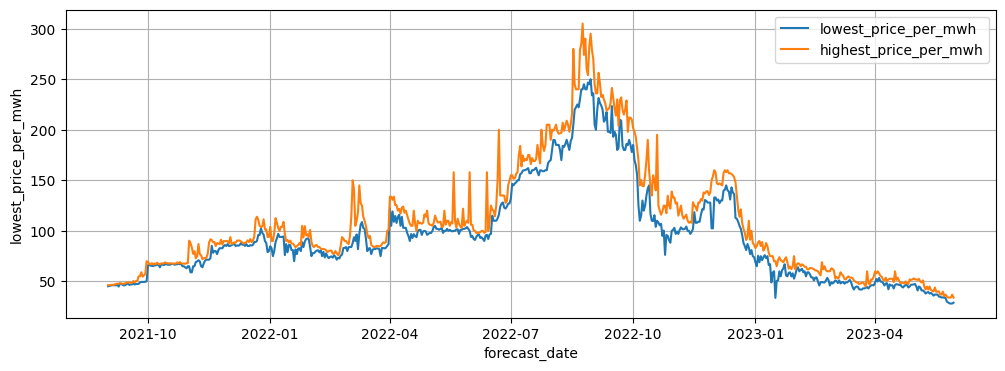

In [13]:
df_gas_prices['forecast_date'] = pd.to_datetime(df_gas_prices['forecast_date'])
fig = plt.figure(figsize=(12, 4))
for col in ['lowest_price_per_mwh', 'highest_price_per_mwh']:
    ax = sns.lineplot(data=df_gas_prices, x='forecast_date', y=col, label=col, ax=fig.gca())
ax.grid()

In [14]:
def expand_price_features(df, df_elect_prices, df_gas_prices):
    df['date'] = pd.to_datetime(df['date'])
    df_elect_prices['date'] = pd.to_datetime(df_elect_prices['forecast_date'])
    df = df.merge(df_elect_prices[['date', 'euros_per_mwh']], how="left", on="date")
    df_gas_prices['date'] = pd.to_datetime(df_gas_prices['forecast_date'])
    df = df.merge(df_gas_prices[['date', 'lowest_price_per_mwh', 'highest_price_per_mwh']], how="left", on="date")
    return df

df_train = expand_price_features(df_train, df_elect_prices, df_gas_prices)
display(df_train.head())

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32


In [15]:
df_weather_forecat = pd.read_csv(os. path.join(PATH_DATASET, f"forecast_weather.csv"))
# df_weather_forecat['datetime'] = pd.to_datetime(df_weather_forecat['forecast_datetime'])
print(f"forecast size: {len(df_weather_forecat)}")
df_weather_hist = pd.read_csv(os. path.join(PATH_DATASET, f"historical_weather.csv"))
# df_weather_hist['datetime'] = pd.to_datetime(df_weather_hist['datetime'])
print(f"histirical size: {len(df_weather_hist)}")
df_weather = pd.concat([df_weather_forecat, df_weather_hist])
# del df_weather_forecat, df_weather_hist
display(df_weather)

forecast size: 3424512
histirical size: 1710800


,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,datetime,rain,surface_pressure,windspeed_10m,winddirection_10m,shortwave_radiation,diffuse_radiation
0,57.6,21.7,2021-09-01 00:00:00+00:00,1.0,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57.6,22.2,2021-09-01 00:00:00+00:00,1.0,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57.6,22.7,2021-09-01 00:00:00+00:00,1.0,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57.6,23.2,2021-09-01 00:00:00+00:00,1.0,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57.6,23.7,2021-09-01 00:00:00+00:00,1.0,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710795,59.7,26.2,NaN,NaN,10.800000,4.100000,0.000000,0.000000,67.000000,40.000000,NaN,NaN,637,NaN,264.0,NaN,0.0,NaN,2023-05-30 10:00:00,0.4,1018.7,1.333333,283.0,440.0,176.0
1710796,59.7,26.7,NaN,NaN,11.400000,2.900000,0.000000,0.000000,69.000000,41.000000,NaN,NaN,637,NaN,283.0,NaN,0.0,NaN,2023-05-30 10:00:00,0.3,1018.8,1.527778,302.0,453.0,170.0
1710797,59.7,27.2,NaN,NaN,9.500000,3.200000,0.000000,0.000000,79.000000,47.000000,NaN,NaN,637,NaN,312.0,NaN,0.0,NaN,2023-05-30 10:00:00,0.1,1018.9,3.416667,302.0,477.0,165.0
1710798,59.7,27.7,NaN,NaN,11.000000,1.600000,0.000000,0.000000,52.000000,31.000000,NaN,NaN,637,NaN,400.0,NaN,0.0,NaN,2023-05-30 10:00:00,0.0,1018.6,3.472222,309.0,535.0,135.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


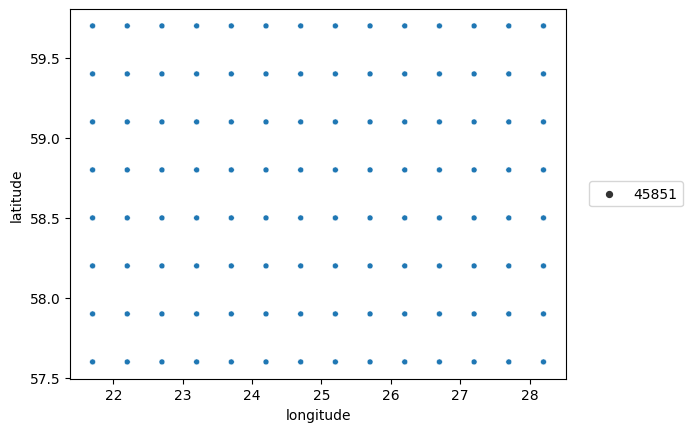

In [16]:
# df_weather['forecast_datetime'] = pd.to_datetime(df_weather['forecast_datetime'])
df_weather_locations = df_weather.groupby(["latitude", "longitude"]).size().reset_index(name="count")
# display(df_weather_locations)
sns.scatterplot(data=df_weather_locations, x="longitude", y="latitude", size="count")
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

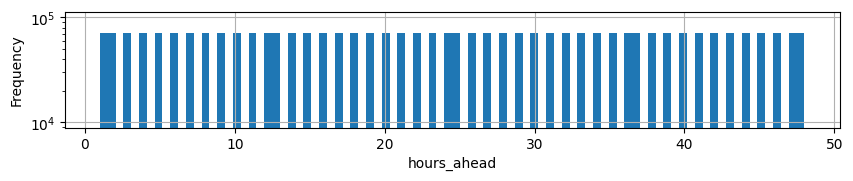

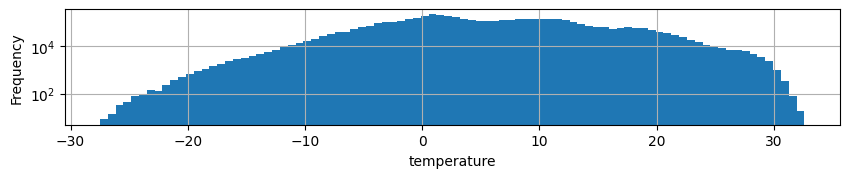

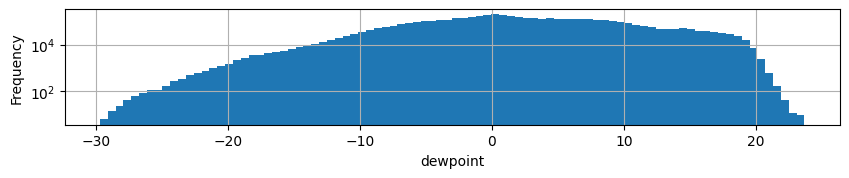

In [17]:
for col in ["hours_ahead", "temperature", "dewpoint"]:
    fig = plt.figure(figsize=(10, 1.5))
    df_weather[col].plot.hist(ax=fig.gca(), bins=90, logy=True, xlabel=col, grid=True)

In [18]:
def expand_weather_features(df, df_weather_forecat, df_weather_hist):
    df_weather_forecat = pd.read_csv(os. path.join(PATH_DATASET, f"forecast_weather.csv"))
    extend_datetime_features(df_weather_forecat, col_dt="forecast_datetime")
    
    print(f"forecast size: {len(df_weather_forecat)}")
    df_weather_hist = pd.read_csv(os. path.join(PATH_DATASET, f"historical_weather.csv"))
    extend_datetime_features(df_weather_hist, col_dt="datetime")
    
    print(f"histirical size: {len(df_weather_hist)}")
    cols_datetime = ['date_year', 'date_month', 'date_day', 'time_hour']
    cols_features = ["temperature", "dewpoint", "cloudcover_mid", "cloudcover_total", "snowfall"]
    df_weather = pd.concat([
        df_weather_forecat[cols_datetime + cols_features],
        df_weather_hist[cols_datetime + cols_features],
    ]).groupby(cols_datetime).mean()
   
    df = df.merge(df_weather, how="left", on=cols_datetime)
    return df

df_train = expand_weather_features(df_train, df_weather_forecat, df_weather_hist)
display(df_train.head())

forecast size: 3424512
histirical size: 1710800


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,temperature,dewpoint,cloudcover_mid,cloudcover_total,snowfall
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32,13.441071,11.199107,5.419643,39.642857,0.0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32,13.441071,11.199107,5.419643,39.642857,0.0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32,13.441071,11.199107,5.419643,39.642857,0.0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32,13.441071,11.199107,5.419643,39.642857,0.0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0,92.51,45.23,46.32,13.441071,11.199107,5.419643,39.642857,0.0


In [19]:
df_train.isnull().sum()

county                      0
is_business                 0
product_type                0
target                      0
is_consumption              0
datetime                    0
data_block_id               0
row_id                      0
prediction_unit_id          0
date                        0
date_year                   0
date_month                  0
date_day                    0
date_dayofyear              0
date_dayofweek              0
date_weekday                0
time_hour                   0
time_minute                 0
date_delta                  0
time_delta                  0
euros_per_mwh            3120
lowest_price_per_mwh     3120
highest_price_per_mwh    3120
temperature                 0
dewpoint                    0
cloudcover_mid              0
cloudcover_total            0
snowfall                    0
dtype: int64

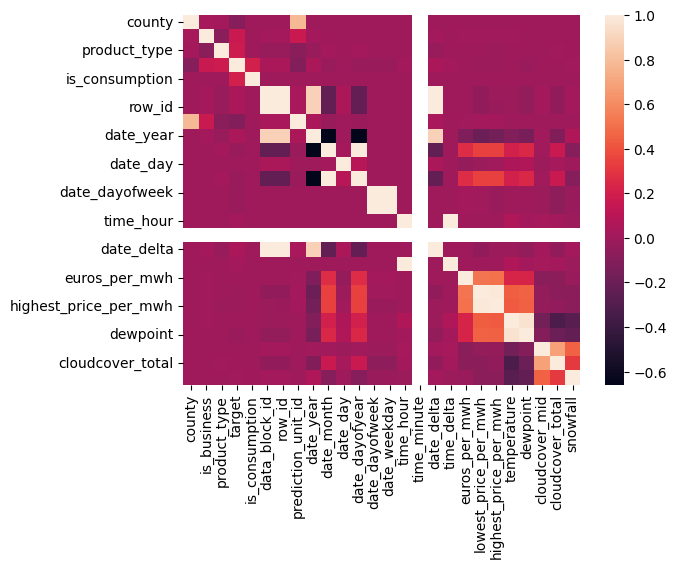

In [20]:
cols_ = [c for c in df_train.columns if c not in ("datetime", "date")]
_= sns.heatmap(df_train[cols_].corr())

In [21]:
df_test = pd.read_csv(os. path.join(PATH_DATASET, "example_test_files", "test.csv"))
print(f"data size: {len(df_test)}")
display(df_test.head())

data size: 12480


,county,is_business,product_type,is_consumption,prediction_datetime,data_block_id,row_id,prediction_unit_id,currently_scored
0,0,0,1,0,2023-05-28 00:00:00,634,2005872,0,False
1,0,0,1,1,2023-05-28 00:00:00,634,2005873,0,False
2,0,0,2,0,2023-05-28 00:00:00,634,2005874,1,False
3,0,0,2,1,2023-05-28 00:00:00,634,2005875,1,False
4,0,0,3,0,2023-05-28 00:00:00,634,2005876,2,False


In [22]:
!head /kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/sample_submission.csv

row_id,data_block_id,target
2005872,634,0
2005873,634,0
2005874,634,0
2005875,634,0
2005876,634,0
2005877,634,0
2005878,634,0
2005879,634,0
2005880,634,0


In [23]:
TRAIN_FEATURES = [
    'county', 'is_business', 'product_type', 'is_consumption',  # 'prediction_unit_id',
    'date_year', 'date_month', 'date_day', 'date_dayofyear', 'date_dayofweek',  # 'date_weekday', 'date_delta',
    'time_hour',  #  'time_minute','time_delta',
    # 'euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh',  <- missing in test dataset
    "temperature", "dewpoint", "cloudcover_mid", "cloudcover_total", "snowfall",
]
COLS_CATEGORY = [
    'county', 'is_business', 'product_type', 'is_consumption',  # 'prediction_unit_id',
    #'date_year', 'date_month', 'date_day', 'date_dayofyear', 'date_dayofweek', 'date_weekday',
]
TRAIN_TARGET = "target"

In [24]:
X_all = df_train[TRAIN_FEATURES]
X_all[COLS_CATEGORY] = X_all[COLS_CATEGORY].astype("category")
y_all = df_train[TRAIN_TARGET].values

/tmp/ipykernel_47/4064886269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all[COLS_CATEGORY] = X_all[COLS_CATEGORY].astype("category")


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)
display(X_train.head())
display(X_train.info())

,county,is_business,product_type,is_consumption,date_year,date_month,date_day,date_dayofyear,date_dayofweek,time_hour,temperature,dewpoint,cloudcover_mid,cloudcover_total,snowfall
497267,4,1,0,1,2022,2,11,42,4,22,-1.943569,-4.827943,1.937081e-01,7.598420,9.061325e-07
1592035,4,1,0,1,2023,1,18,18,2,1,2.013171,1.076235,2.574630e+01,33.952824,2.103883e-04
1262576,0,1,3,0,2022,10,8,281,5,19,11.549763,9.235264,1.824557e+01,25.167735,0.000000e+00
1980612,5,0,3,0,2023,5,20,140,5,6,9.850104,5.033442,4.087176e-07,3.587095,0.000000e+00
661370,9,0,3,0,2022,4,4,94,0,10,2.443651,-1.563761,2.667080e+01,33.113095,2.142893e-03


<class 'pandas.core.frame.DataFrame'>
Index: 1614259 entries, 497267 to 121958
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   county            1614259 non-null  category
 1   is_business       1614259 non-null  category
 2   product_type      1614259 non-null  category
 3   is_consumption    1614259 non-null  category
 4   date_year         1614259 non-null  int32   
 5   date_month        1614259 non-null  int32   
 6   date_day          1614259 non-null  int32   
 7   date_dayofyear    1614259 non-null  int32   
 8   date_dayofweek    1614259 non-null  int32   
 9   time_hour         1614259 non-null  int32   
 10  temperature       1614259 non-null  float64 
 11  dewpoint          1614259 non-null  float64 
 12  cloudcover_mid    1614259 non-null  float64 
 13  cloudcover_total  1614259 non-null  float64 
 14  snowfall          1614259 non-null  float64 
dtypes: category(4), float64(5), int32

None

In [26]:
!pip install -U -q xgboost -f /kaggle/input/xgboost-python-package --no-index

In [27]:
import time
import xgboost as xgb

print(xgb.__version__)

model = xgb.XGBRegressor(
    device="cuda",
    tree_method="hist",
    enable_categorical=True,
    objective='reg:absoluteerror',
    #learning_rate=0.01,
    #sampling_method='gradient_based',
    #grow_policy='lossguide',
    eval_metric='mae',
# max_depth is an optional parameter that shows the maximum depth of each decision tree.
    max_depth=20,
# learning_rate is an optional parameter where the step size shrinkage prevents overfitting.
# subsample is an optional parameter representing the fraction of samples used for each tree.
    subsample=1,
# colsample_bytree is an optional parameter representing the fraction of features used for each tree.
    colsample_bytree=1,
# n_estimators is a required parameter that determines the number of boosting iterations and controls the overall complexity of the model.
    n_estimators=800,
# Maximum number of leaves; 0 indicates no limit.
    max_leaves=512,
# L1 regularization term on weights (xgb’s alpha).
    reg_alpha=2.5,
# L2 regularization term on weights (xgb’s lambda).
    reg_lambda=9.5,
# The feature importance type for the feature_importances_ property
    importance_type="total_gain",
# OTHER
    random_state=42,
)

start = time.time()
# Training the model on the training data
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    early_stopping_rounds=100,
    verbose=True)
elapsed = time.time() - start
print(f"training took: {elapsed / 60.} min")
print(model)

2.0.1


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mae:235.86054
[1]	validation_0-mae:208.57197
[2]	validation_0-mae:182.21312
[3]	validation_0-mae:157.70504
[4]	validation_0-mae:130.81554
[5]	validation_0-mae:115.01381
[6]	validation_0-mae:101.64632
[7]	validation_0-mae:91.96975
[8]	validation_0-mae:86.06055
[9]	validation_0-mae:81.28063
[10]	validation_0-mae:78.28449
[11]	validation_0-mae:76.81949
[12]	validation_0-mae:74.31997
[13]	validation_0-mae:73.06756
[14]	validation_0-mae:69.83375
[15]	validation_0-mae:69.57481
[16]	validation_0-mae:68.70042
[17]	validation_0-mae:67.52861
[18]	validation_0-mae:67.26019
[19]	validation_0-mae:66.83624
[20]	validation_0-mae:66.58041
[21]	validation_0-mae:65.96286
[22]	validation_0-mae:65.56029
[23]	validation_0-mae:65.41950
[24]	validation_0-mae:65.09406
[25]	validation_0-mae:63.99852
[26]	validation_0-mae:63.76305
[27]	validation_0-mae:63.49562
[28]	validation_0-mae:63.38183
[29]	validation_0-mae:62.88269
[30]	validation_0-mae:62.50946
[31]	validation_0-mae:62.36647
[32]	valida

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Making predictions on the test set
predictions = model.predict(X_valid)

# Calculate the mean absolute and squared error
print("Mean Absolute Error:", mean_absolute_error(y_valid, predictions))

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:41:52] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Mean Absolute Error: 45.12072926655567


In [29]:
model.fit(X_all, y_all)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cuda', early_stopping_rounds=None, enable_categorical=True,
             eval_metric='mae', feature_types=None, gamma=None,
             grow_policy=None, importance_type='total_gain',
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=512,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [30]:
!head submission.csv

In [31]:
import enefit
env = enefit.make_env()
iter_test = env.iter_test()

In [32]:
from tqdm.auto import tqdm

counter = 0
for (test, revealed_targets, client, historical_weather, 
     forecast_weather, electricity_prices, gas_prices, sample_prediction) in tqdm(iter_test):
    df_test = test.merge(sample_prediction, how="left", on="row_id")
    extend_datetime_features(
        df_test, col_dt="prediction_datetime", datetime_offset=datetime_offset)
    df_test = expand_price_features(df_test, electricity_prices, gas_prices)
    df_test = expand_weather_features(df_test, forecast_weather, historical_weather)
    X_test = df_test[TRAIN_FEATURES]
    X_test[COLS_CATEGORY] = X_test[COLS_CATEGORY].astype("category")
    #X_test = scaler.transform(X_test)

    assert df_test["row_id"].tolist() == sample_prediction["row_id"].tolist()
    sample_prediction["target"] = model.predict(X_test).clip(0)
    if counter < 3:
        display(df_test.head())
        display(sample_prediction.head())

    env.predict(sample_prediction)
    counter += 1

0it [00:00, ?it/s]

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
forecast size: 3424512
histirical size: 1710800


/tmp/ipykernel_47/805660696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[COLS_CATEGORY] = X_test[COLS_CATEGORY].astype("category")


,county,is_business,product_type,is_consumption,prediction_datetime,row_id,prediction_unit_id,currently_scored,target,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,temperature,dewpoint,cloudcover_mid,cloudcover_total,snowfall
0,0,False,1,False,2023-05-28,2005872,0,False,0.0,2023-05-28,2023,5,28,148,6,6,0,0,634,0.0,NaN,NaN,NaN,8.779156,3.341887,0.006045,0.215683,0.0
1,0,False,1,True,2023-05-28,2005873,0,False,0.0,2023-05-28,2023,5,28,148,6,6,0,0,634,0.0,NaN,NaN,NaN,8.779156,3.341887,0.006045,0.215683,0.0
2,0,False,2,False,2023-05-28,2005874,1,False,0.0,2023-05-28,2023,5,28,148,6,6,0,0,634,0.0,NaN,NaN,NaN,8.779156,3.341887,0.006045,0.215683,0.0
3,0,False,2,True,2023-05-28,2005875,1,False,0.0,2023-05-28,2023,5,28,148,6,6,0,0,634,0.0,NaN,NaN,NaN,8.779156,3.341887,0.006045,0.215683,0.0
4,0,False,3,False,2023-05-28,2005876,2,False,0.0,2023-05-28,2023,5,28,148,6,6,0,0,634,0.0,NaN,NaN,NaN,8.779156,3.341887,0.006045,0.215683,0.0


,row_id,target
0,2005872,2.067974
1,2005873,585.546814
2,2005874,0.000004
3,2005875,6.112711
4,2005876,13.518608


forecast size: 3424512
histirical size: 1710800


/tmp/ipykernel_47/805660696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[COLS_CATEGORY] = X_test[COLS_CATEGORY].astype("category")


,county,is_business,product_type,is_consumption,prediction_datetime,row_id,prediction_unit_id,currently_scored,target,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,temperature,dewpoint,cloudcover_mid,cloudcover_total,snowfall
0,0,False,1,False,2023-05-29,2008992,0,False,0.0,2023-05-29,2023,5,29,149,0,0,0,0,635,0.0,NaN,NaN,NaN,10.664082,7.612775,6.094387,7.02641,0.0
1,0,False,1,True,2023-05-29,2008993,0,False,0.0,2023-05-29,2023,5,29,149,0,0,0,0,635,0.0,NaN,NaN,NaN,10.664082,7.612775,6.094387,7.02641,0.0
2,0,False,2,False,2023-05-29,2008994,1,False,0.0,2023-05-29,2023,5,29,149,0,0,0,0,635,0.0,NaN,NaN,NaN,10.664082,7.612775,6.094387,7.02641,0.0
3,0,False,2,True,2023-05-29,2008995,1,False,0.0,2023-05-29,2023,5,29,149,0,0,0,0,635,0.0,NaN,NaN,NaN,10.664082,7.612775,6.094387,7.02641,0.0
4,0,False,3,False,2023-05-29,2008996,2,False,0.0,2023-05-29,2023,5,29,149,0,0,0,0,635,0.0,NaN,NaN,NaN,10.664082,7.612775,6.094387,7.02641,0.0


,row_id,target
0,2008992,2.077976
1,2008993,459.519196
2,2008994,0.000004
3,2008995,4.946608
4,2008996,11.778088


forecast size: 3424512
histirical size: 1710800


/tmp/ipykernel_47/805660696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[COLS_CATEGORY] = X_test[COLS_CATEGORY].astype("category")


,county,is_business,product_type,is_consumption,prediction_datetime,row_id,prediction_unit_id,currently_scored,target,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,temperature,dewpoint,cloudcover_mid,cloudcover_total,snowfall
0,0,False,1,False,2023-05-30,2012112,0,False,0.0,2023-05-30,2023,5,30,150,1,1,0,0,636,0.0,NaN,NaN,NaN,9.346792,2.730865,18.291467,16.203446,0.0
1,0,False,1,True,2023-05-30,2012113,0,False,0.0,2023-05-30,2023,5,30,150,1,1,0,0,636,0.0,NaN,NaN,NaN,9.346792,2.730865,18.291467,16.203446,0.0
2,0,False,2,False,2023-05-30,2012114,1,False,0.0,2023-05-30,2023,5,30,150,1,1,0,0,636,0.0,NaN,NaN,NaN,9.346792,2.730865,18.291467,16.203446,0.0
3,0,False,2,True,2023-05-30,2012115,1,False,0.0,2023-05-30,2023,5,30,150,1,1,0,0,636,0.0,NaN,NaN,NaN,9.346792,2.730865,18.291467,16.203446,0.0
4,0,False,3,False,2023-05-30,2012116,2,False,0.0,2023-05-30,2023,5,30,150,1,1,0,0,636,0.0,NaN,NaN,NaN,9.346792,2.730865,18.291467,16.203446,0.0


,row_id,target
0,2012112,2.064589
1,2012113,518.718689
2,2012114,0.000004
3,2012115,5.124454
4,2012116,11.067780


forecast size: 3424512
histirical size: 1710800


/tmp/ipykernel_47/805660696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[COLS_CATEGORY] = X_test[COLS_CATEGORY].astype("category")


In [33]:
!head submission.csv

row_id,target
2005872,2.067974
2005873,585.5468
2005874,3.8146973e-06
2005875,6.112711
2005876,13.518608
2005877,1496.3712
2005878,3.8146973e-06
2005879,501.26453
2005880,3.8146973e-06
